In [2]:
# Importation des bibliothèques Python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split

In [3]:
# Importation des données
data_path = "C:\\Users\\AxelArcidiaco\\Documents\\GRETA\\Projet Dev\\Classification\\Projet Classification\\data\\" 
data = pd.read_csv(data_path + "card_credit_fraud_Classification project Final.csv")
data.head()

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
data.shape

(1008213, 11)

In [5]:
data.dtypes

transactionId       int64
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

<AxesSubplot:ylabel='None'>

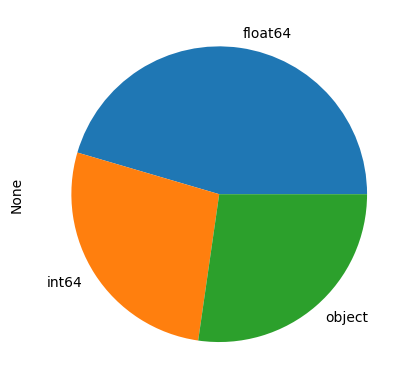

In [6]:
df = data.copy()

df.dtypes.value_counts().plot.pie()

c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

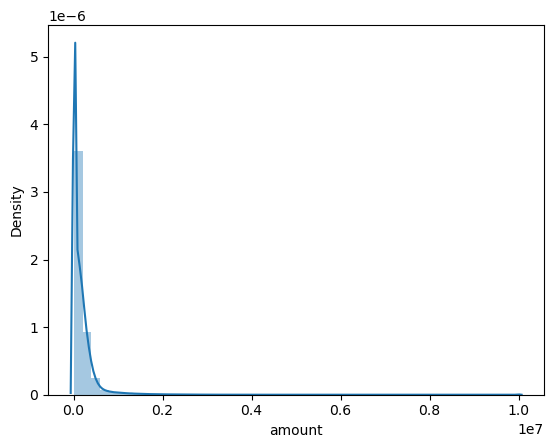

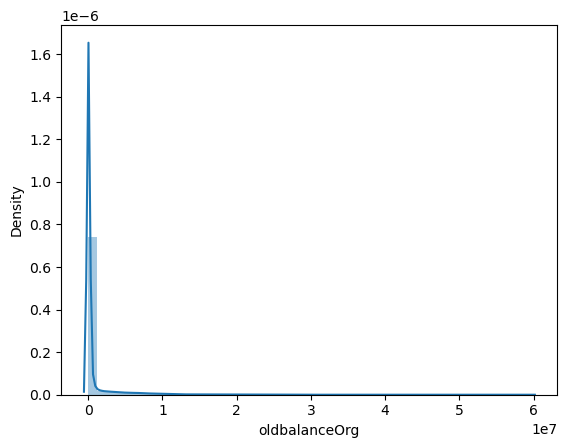

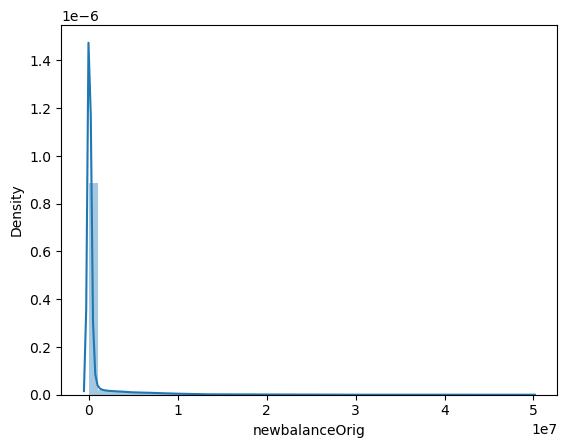

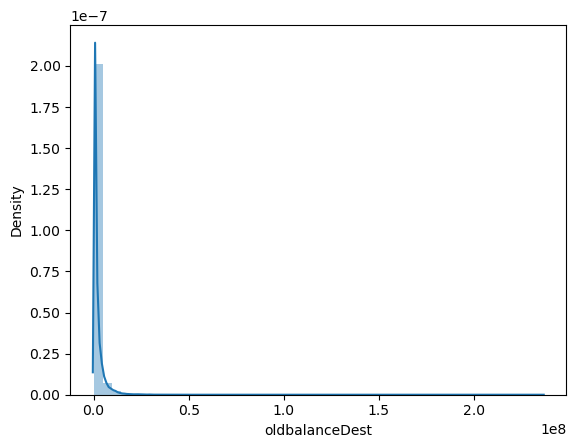

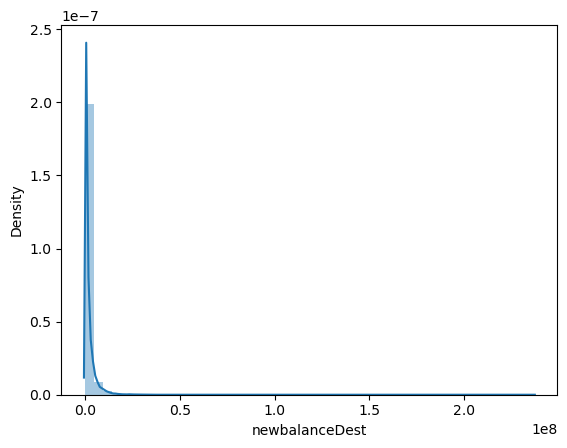

In [7]:
for col in df.select_dtypes('float'):
	plt.figure()
	sns.distplot(df[col])

<AxesSubplot:ylabel='type'>

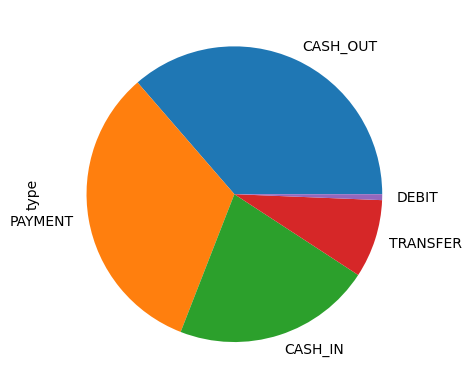

In [8]:
df["type"].value_counts().plot.pie()

In [9]:
for col in df.select_dtypes('object'):
	print(f'{col :-<50} {df[col].unique()}')

type---------------------------------------------- ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
nameOrig------------------------------------------ ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']
nameDest------------------------------------------ ['M1979787155' 'M2044282225' 'C553264065' ... 'C1881841831' 'C1365125890'
 'C2080388513']


KeyboardInterrupt: 

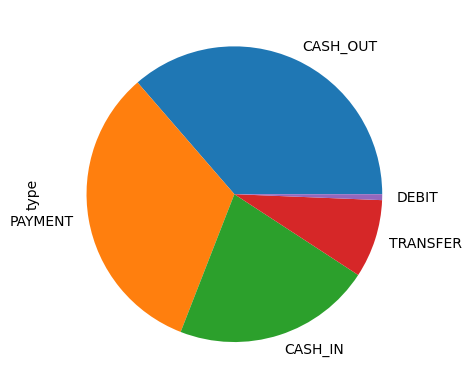

In [9]:
# for col in df.select_dtypes('object'):
# 	plt.figure()
# 	df[col].value_counts().plot.pie()

<AxesSubplot:xlabel='type', ylabel='count'>

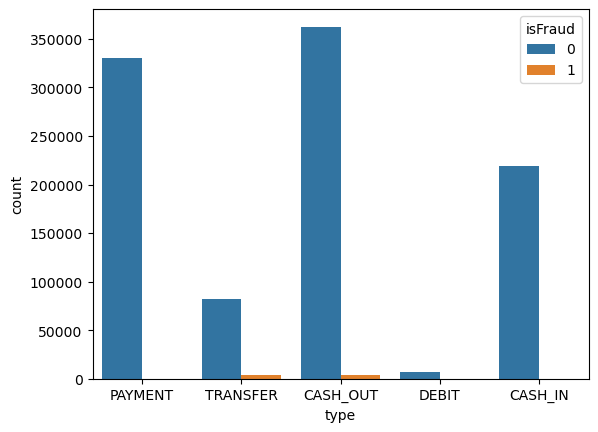

In [10]:
sns.countplot(x='type', hue='isFraud', data=df)

<AxesSubplot:xlabel='step', ylabel='count'>

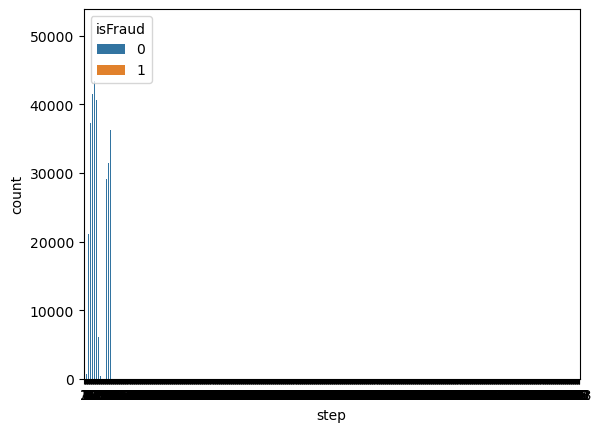

In [11]:
sns.countplot(x='step', hue='isFraud', data=df)

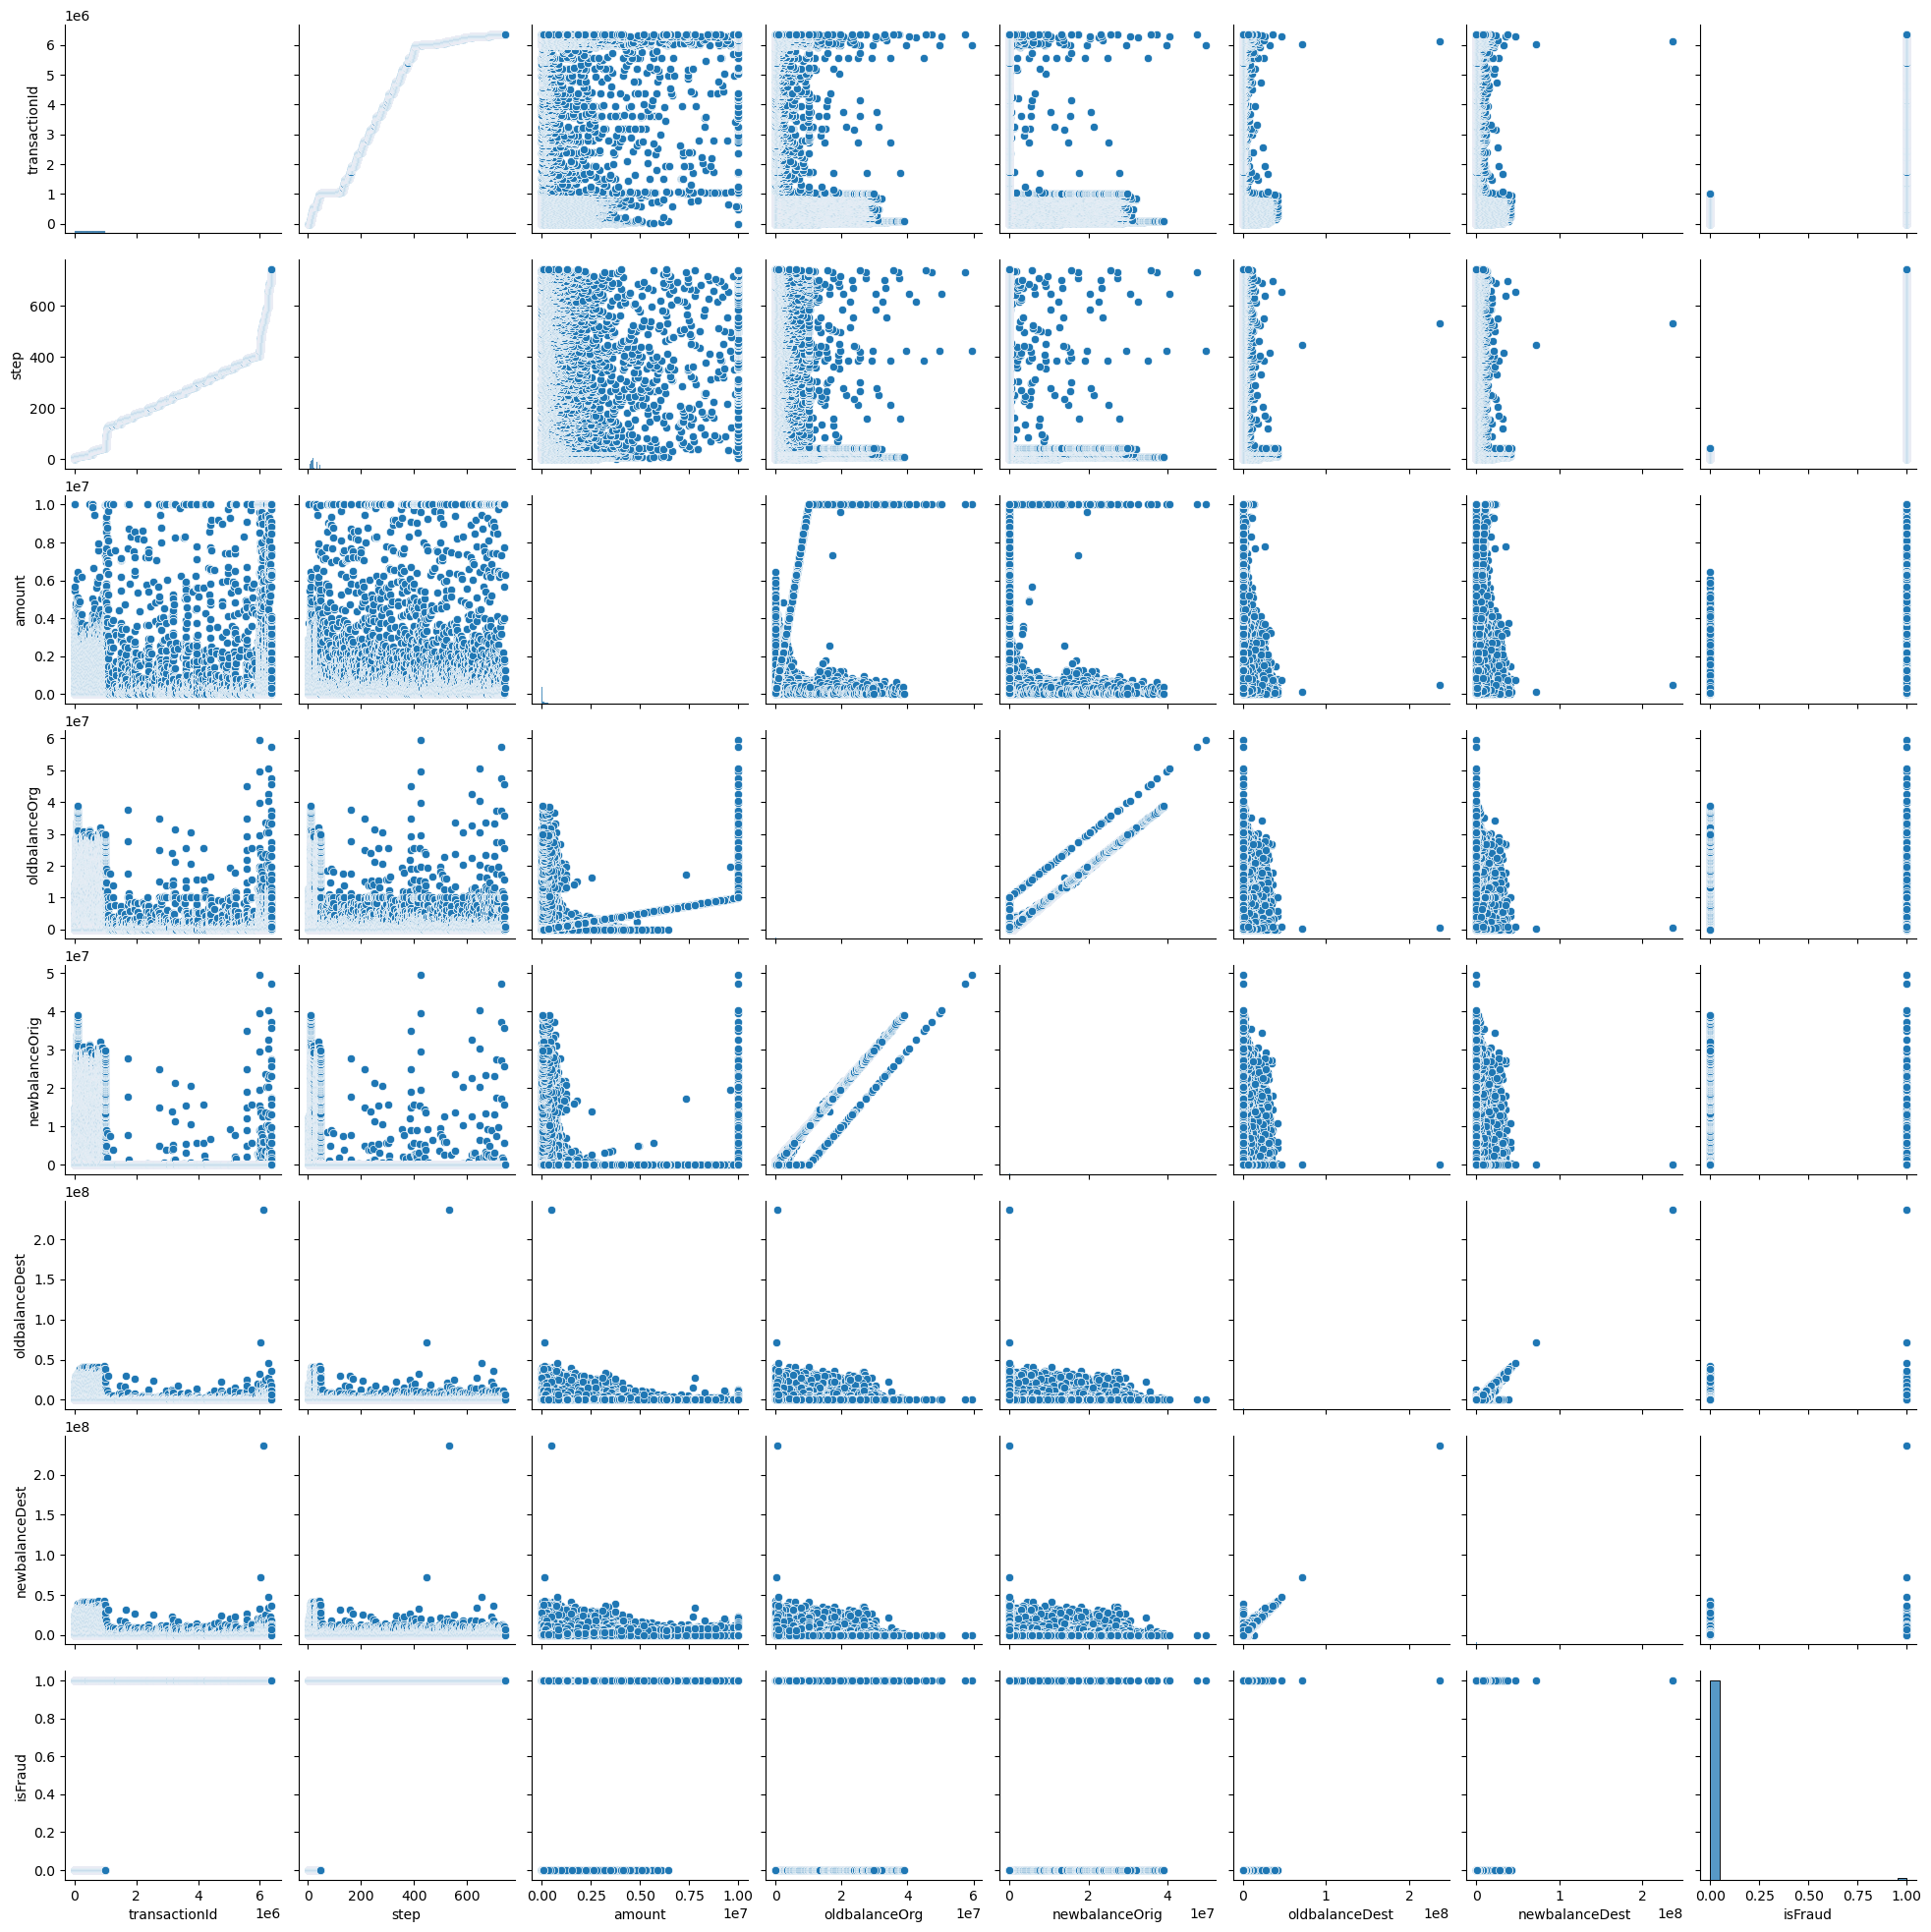

In [13]:
sns.pairplot(data=df)

In [14]:
print("Nombre de fraudes dans le dataset = {}".format((data['isFraud']==1).sum()))
print("Nombre de non-fraudes dans le dataset = {}".format((data['isFraud']==0).sum()))

Nombre de fraudes dans le dataset = 8213
Nombre de non-fraudes dans le dataset = 1000000


In [15]:
df_forest = data.copy()

In [18]:
trainset, testset = train_test_split(df_forest, test_size=0.42, random_state=42)

In [19]:
trainset

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
135107,135107,11,CASH_OUT,103553.32,C1250094842,2137.00,0.00,C1919269232,258607.76,738632.19,0
454047,454047,19,CASH_IN,25374.10,C962679042,5380113.21,5405487.31,C1147590601,141609.85,116235.75,0
997958,997958,45,PAYMENT,9298.19,C879164764,0.00,0.00,M156077018,0.00,0.00,0
713652,713652,37,CASH_OUT,146277.94,C327545228,0.00,0.00,C1667891306,573211.16,719489.10,0
394559,394559,18,CASH_OUT,340091.24,C689611930,0.00,0.00,C1620029891,11104741.31,11444832.54,0
...,...,...,...,...,...,...,...,...,...,...,...
259178,259178,14,PAYMENT,6080.01,C1799015064,0.00,0.00,M1512827127,0.00,0.00,0
365838,365838,17,PAYMENT,32678.56,C1410136434,27695.00,0.00,M1300032810,0.00,0.00,0
131932,131932,11,CASH_OUT,246261.18,C1837685293,24818.00,0.00,C414587860,253759.00,555355.09,0
671155,671155,36,CASH_OUT,512966.59,C581791704,20230.00,0.00,C692721554,21897.92,534864.51,0


In [20]:
testset

,transactionId,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
334461,334461,16,CASH_OUT,420214.44,C127643942,272472.00,0.00,C1466311544,325299.92,745514.36,0
985539,985539,45,CASH_OUT,157670.13,C2073086065,0.00,0.00,C390414492,9701468.96,9859139.09,0
260806,260806,14,PAYMENT,15780.45,C213055032,151907.00,136126.55,M1672090527,0.00,0.00,0
226737,226737,14,PAYMENT,12654.59,C553619671,152236.79,139582.20,M497804928,0.00,0.00,0
355517,355517,17,CASH_OUT,14336.18,C1324406556,0.00,0.00,C1396251115,219460.34,233796.53,0
...,...,...,...,...,...,...,...,...,...,...,...
686893,686893,36,CASH_OUT,104170.58,C357685394,0.00,0.00,C193553253,2394542.19,2137308.83,0
310712,310712,16,PAYMENT,5136.01,C231373764,0.00,0.00,M665239720,0.00,0.00,0
760976,760976,38,CASH_IN,126134.40,C105807465,5686380.73,5812515.13,C522003056,979895.79,853761.39,0
887396,887396,42,CASH_IN,251664.87,C767970439,3548890.72,3800555.59,C1563613407,3438365.60,3186700.73,0
